- 따로 파일을 넣지 않아도 실행됩니다!!

In [ ]:
!git clone 'https://github.com/dkdlel395/web.git'

fatal: destination path 'web' already exists and is not an empty directory.


In [ ]:
!pip install -qr web/requirement.txt
!pip install -q mediapipe==0.9.1.0
!pip install -q autokeras==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.4 MB/s eta 0:00:00
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/colabtools/dist/google-colab-1.0.0.tar.gz'



# X train 생성

## 데이터 로드

In [ ]:
!unzip -qqy "/content/web/cam1.zip"

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
!mkdir image

mkdir: cannot create directory ‘image’: File exists


## 영상 0.1초 단위로 이미지 자르기

In [ ]:
import cv2

count = 0

vidcap = cv2.VideoCapture(f'/content/cam1.avi')
 
# 영상기준 0.5 초에 들어가는 Frame수
print(vidcap.get(cv2.CAP_PROP_FPS))
vid_fps = 0.5 / ( 1 / float(vidcap.get(cv2.CAP_PROP_FPS)))
print(vid_fps)
while(vidcap.isOpened()):
    ret, image = vidcap.read()
    
    if(int(vidcap.get(1)) % vid_fps  == 0):
        print('Saved frame number : ' + str(int(vidcap.get(1))))
        cv2.imwrite("/content/image/frame%d.jpg" % count, image)
        print('Saved frame%d.jpg' % count)
        count += 1
    if image is None:
      break

vidcap.release()

120.0
60.0
Saved frame number : 60
Saved frame0.jpg
Saved frame number : 120
Saved frame1.jpg
Saved frame number : 180
Saved frame2.jpg
Saved frame number : 240
Saved frame3.jpg
Saved frame number : 300
Saved frame4.jpg
Saved frame number : 360
Saved frame5.jpg
Saved frame number : 420
Saved frame6.jpg
Saved frame number : 480
Saved frame7.jpg
Saved frame number : 540
Saved frame8.jpg
Saved frame number : 600
Saved frame9.jpg
Saved frame number : 660
Saved frame10.jpg
Saved frame number : 720
Saved frame11.jpg
Saved frame number : 780
Saved frame12.jpg
Saved frame number : 840
Saved frame13.jpg
Saved frame number : 900
Saved frame14.jpg
Saved frame number : 960
Saved frame15.jpg
Saved frame number : 1020
Saved frame16.jpg
Saved frame number : 1080
Saved frame17.jpg
Saved frame number : 1140
Saved frame18.jpg
Saved frame number : 1200
Saved frame19.jpg
Saved frame number : 1260
Saved frame20.jpg
Saved frame number : 1320
Saved frame21.jpg
Saved frame number : 1380
Saved frame22.jpg
Save

## 0.1초 단위 미디어 파이프 처리

In [ ]:
final_data_name = 'final_train_data.csv'
data_cnt = 25

import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
col = ['nose_x', 'nose_y', 'nose_z', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z','right_shoulder_x','right_shoulder_y', 'right_shoulder_z',
      'left_elbow_x','left_elbow_y',' left_elbow_z','right_elbow_x','right_elbow_y','right_elbow_z',
       'left_wrist_x','left_wrist_y','left_wrist_z','right_wrist_x','right_wrist_y','right_wrist_z',
       'left_hip_x','left_hip_y','left_hip_z', 'right_hip_x', 'right_hip_y','right_hip_z','left_knee_x','left_knee_y','left_knee_z',
       'right_knee_x','right_knee_y','right_knee_z','left_ankle_x','left_ankle_y','left_ankle_z','right_ankle_x','right_ankle_y','right_ankle_z']
# data = pd.DataFrame(columns=col)
data = pd.DataFrame()

tot_img = data_cnt + 1
for i in range(0,tot_img):
  # /content/final_image/frame_1.jpg
  img1 = f'/content/image/frame{i}.jpg'
  IMAGE_FILES = [img1]    
  BG_COLOR = (192, 192, 192)  # 회색
  print('총 처리 개수 : ', tot_img)
  print('현재 처리 : ',i)
  with mp_pose.Pose(
          static_image_mode=True,
          model_complexity=2,
          enable_segmentation=True,
          min_detection_confidence=0.5) as pose:
      for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        # 처리 전 BGR 이미지를 RGB로 변환합니다.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        datas = []
        if not results.pose_landmarks:
          for i in range(0, 39):
            datas.append([0])
        else:
          for n in range(0,39,3):
            cate = col[n][:-2].upper()
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].x])
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].y])
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].z])
        data = data.append(pd.Series(datas), ignore_index=True)

data.to_csv(final_data_name, index=False)

총 처리 개수 :  26
현재 처리 :  0


<ipython-input-44-a87bc57a9e44>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(datas), ignore_index=True)


총 처리 개수 :  26
현재 처리 :  1


<ipython-input-44-a87bc57a9e44>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(datas), ignore_index=True)


총 처리 개수 :  26
현재 처리 :  2
총 처리 개수 :  26
현재 처리 :  3
총 처리 개수 :  26
현재 처리 :  4
총 처리 개수 :  26
현재 처리 :  5
총 처리 개수 :  26
현재 처리 :  6
총 처리 개수 :  26
현재 처리 :  7
총 처리 개수 :  26
현재 처리 :  8
총 처리 개수 :  26
현재 처리 :  9
총 처리 개수 :  26
현재 처리 :  10
총 처리 개수 :  26
현재 처리 :  11
총 처리 개수 :  26
현재 처리 :  12
총 처리 개수 :  26
현재 처리 :  13
총 처리 개수 :  26
현재 처리 :  14
총 처리 개수 :  26
현재 처리 :  15
총 처리 개수 :  26
현재 처리 :  16
총 처리 개수 :  26
현재 처리 :  17
총 처리 개수 :  26
현재 처리 :  18
총 처리 개수 :  26
현재 처리 :  19
총 처리 개수 :  26
현재 처리 :  20
총 처리 개수 :  26
현재 처리 :  21
총 처리 개수 :  26
현재 처리 :  22
총 처리 개수 :  26
현재 처리 :  23
총 처리 개수 :  26
현재 처리 :  24
총 처리 개수 :  26
현재 처리 :  25


In [ ]:
data_ori = pd.read_csv(final_data_name)
data_ori

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
1,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
2,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
3,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
4,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
5,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
6,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
7,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
8,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
9,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]


## train 0.5초 단위로 변환

In [ ]:
data_5cut_name = 'final_data_5cut.csv'
data_5cut = pd.DataFrame()


for i in range(0,26+1,5):
  data_ori_5cut = []
  for num in range(0,5):
    if data_ori.loc[i+num][1] != 0:
      data_ori_5cut = data_ori.loc[i]
      break
    elif num == 4:
      data_ori_5cut.append([np.zeros(39)])
  data_5cut = data_5cut.append(pd.Series(data_ori_5cut), ignore_index=True)
data_5cut.to_csv(data_5cut_name, index=False)

<ipython-input-46-a2d3e09d98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_5cut = data_5cut.append(pd.Series(data_ori_5cut), ignore_index=True)
<ipython-input-46-a2d3e09d98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_5cut = data_5cut.append(pd.Series(data_ori_5cut), ignore_index=True)
<ipython-input-46-a2d3e09d98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_5cut = data_5cut.append(pd.Series(data_ori_5cut), ignore_index=True)
<ipython-input-46-a2d3e09d98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_5cut = data_5cut.append(pd.Series(data_ori_5cut), ignore_index=True)
<ipython-input-46-a2

In [ ]:
data_5cut_ori = pd.read_csv(data_5cut_name)
data_5cut_ori

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
1,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
2,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
3,[0.5674102902412415],[0.15108390152454376],[-0.19627299904823303],[0.5628673434257507],[0.17755214869976044],[-0.07151330262422562],[0.5299273729324341],[0.1926075518131256],[-0.17422577738761902],[0.5707368850708008],...,[0.10387707501649857],[0.5472590923309326],[0.34332364797592163],[0.014418612234294415],[0.5368750691413879],[0.3803713023662567],[0.21604974567890167],[0.5260552763938904],[0.40345820784568787],[0.11163771152496338]
4,[0.2829768657684326],[0.3522215187549591],[0.09133487194776535],[0.33595284819602966],[0.3553183376789093],[0.22098755836486816],[0.3011709451675415],[0.36669597029685974],[-0.0004372985858935863],[0.3758290112018585],...,[0.00043037731666117907],[0.45168906450271606],[0.5054917931556702],[-0.15700560808181763],[0.518852949142456],[0.5553590059280396],[-0.0032601740676909685],[0.5024840831756592],[0.575700044631958],[-0.16996394097805023]
5,[0.6244317889213562],[0.4011361300945282],[-0.7311089634895325],[0.6840090751647949],[0.42108675837516785],[-0.49622127413749695],[0.5943121910095215],[0.4102305471897125],[-0.4580165147781372],[0.7012406587600708],...,[0.1342921406030655],[0.5588369369506836],[0.6160579919815063],[0.19906193017959595],[0.5832093954086304],[0.692757785320282],[0.5279146432876587],[0.5304479598999023],[0.6807928681373596],[0.5368247628211975]


## train 변화량 계산

In [ ]:
# X 만들기
X_data_name = 'final_train.csv'

data_dif = pd.DataFrame()

tot_csv = 5 + 1
for i in range(1,tot_csv):
  difs = []
  for num in range(0,39):
    ori = data_5cut_ori.loc[i][num].replace('[','').replace(']','')
    bef = data_5cut_ori.loc[i-1][num].replace('[','').replace(']','')
    if bef == 0:
      dif = 0
      difs.append(dif)
    elif ori == 0:
      dif = 0
      difs.append(dif)
    else:
      dif = abs(float(ori) - float(bef))

      difs.append(dif)


  data_dif = data_dif.append(pd.Series(difs), ignore_index=True)
data_dif.to_csv(X_data_name, index=False)

<ipython-input-48-8c9ba158bced>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_dif = data_dif.append(pd.Series(difs), ignore_index=True)
<ipython-input-48-8c9ba158bced>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_dif = data_dif.append(pd.Series(difs), ignore_index=True)


In [ ]:
data_dif

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.567410,0.151084,0.196273,0.562867,0.177552,0.071513,0.529927,0.192608,0.174226,0.570737,...,0.103877,0.547259,0.343324,0.014419,0.536875,0.380371,0.216050,0.526055,0.403458,0.111638
3,0.284433,0.201138,0.287608,0.226914,0.177766,0.292501,0.228756,0.174088,0.173788,0.194908,...,0.103447,0.095570,0.162168,0.171424,0.018022,0.174988,0.219310,0.023571,0.172242,0.281602
4,0.341455,0.048915,0.822444,0.348056,0.065768,0.717209,0.293141,0.043535,0.457579,0.325412,...,0.133862,0.107148,0.110566,0.356068,0.064356,0.137399,0.531175,0.027964,0.105093,0.706789


# X predict 생성

In [ ]:
!mkdir predict_image

mkdir: cannot create directory ‘predict_image’: File exists


## 영상 -> 이미지

In [ ]:
import cv2

count = 0

vidcap = cv2.VideoCapture(f'/content/cam2.avi')
 
# 영상기준 0.5 초에 들어가는 Frame수
print(vidcap.get(cv2.CAP_PROP_FPS))
vid_fps = 0.5 / ( 1 / float(vidcap.get(cv2.CAP_PROP_FPS)))
print(vid_fps)
while(vidcap.isOpened()):
    ret, image = vidcap.read()
    
    if(int(vidcap.get(1)) % vid_fps  == 0):
        print('Saved frame number : ' + str(int(vidcap.get(1))))
        cv2.imwrite("/content/predict_image/frame%d.jpg" % count, image)
        print('Saved frame%d.jpg' % count)
        count += 1
    if image is None:
      break

vidcap.release()

120.0
60.0
Saved frame number : 60
Saved frame0.jpg
Saved frame number : 120
Saved frame1.jpg
Saved frame number : 180
Saved frame2.jpg
Saved frame number : 240
Saved frame3.jpg
Saved frame number : 300
Saved frame4.jpg
Saved frame number : 360
Saved frame5.jpg
Saved frame number : 420
Saved frame6.jpg
Saved frame number : 480
Saved frame7.jpg
Saved frame number : 540
Saved frame8.jpg
Saved frame number : 600
Saved frame9.jpg
Saved frame number : 660
Saved frame10.jpg
Saved frame number : 720
Saved frame11.jpg
Saved frame number : 780
Saved frame12.jpg
Saved frame number : 840
Saved frame13.jpg
Saved frame number : 900
Saved frame14.jpg
Saved frame number : 960
Saved frame15.jpg
Saved frame number : 1020
Saved frame16.jpg
Saved frame number : 1080
Saved frame17.jpg
Saved frame number : 1140
Saved frame18.jpg
Saved frame number : 1200
Saved frame19.jpg
Saved frame number : 1260
Saved frame20.jpg
Saved frame number : 1320
Saved frame21.jpg
Saved frame number : 1380
Saved frame22.jpg
Save

## 이미지 -> 미디어파이프 -> csv파일

In [ ]:
final_predict_name = 'final_predict_data.csv'
data_cnt = 24

import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
col = ['nose_x', 'nose_y', 'nose_z', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z','right_shoulder_x','right_shoulder_y', 'right_shoulder_z',
      'left_elbow_x','left_elbow_y',' left_elbow_z','right_elbow_x','right_elbow_y','right_elbow_z',
       'left_wrist_x','left_wrist_y','left_wrist_z','right_wrist_x','right_wrist_y','right_wrist_z',
       'left_hip_x','left_hip_y','left_hip_z', 'right_hip_x', 'right_hip_y','right_hip_z','left_knee_x','left_knee_y','left_knee_z',
       'right_knee_x','right_knee_y','right_knee_z','left_ankle_x','left_ankle_y','left_ankle_z','right_ankle_x','right_ankle_y','right_ankle_z']

predict_data = pd.DataFrame()
# 이미지 파일의 경우 이것을 사용하세요.:

tot_img = data_cnt + 1
for i in range(0,tot_img):
  # /content/predict_image/frame_0.jpg
  img1 = f'/content/predict_image/frame{i}.jpg'
  IMAGE_FILES = [img1]
  BG_COLOR = (192, 192, 192)  # 회색
  print('총 처리 개수 : ', tot_img)
  print('현재 처리 : ',i)
  with mp_pose.Pose(
          static_image_mode=True,
          model_complexity=2,
          enable_segmentation=True,
          min_detection_confidence=0.5) as pose:
      for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        # 처리 전 BGR 이미지를 RGB로 변환합니다.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        datas = []
        if not results.pose_landmarks:
          for i in range(0, 39):
            datas.append([0])
        else:
          for n in range(0,39,3):
            cate = col[n][:-2].upper()
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].x])
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].y])
            datas.append([results.pose_landmarks.landmark[mp_pose.PoseLandmark[cate]].z])
        predict_data = predict_data.append(pd.Series(datas), ignore_index=True)

predict_data.to_csv(final_predict_name, index=False)

총 처리 개수 :  25
현재 처리 :  0


<ipython-input-52-1f414e13aeac>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_data = predict_data.append(pd.Series(datas), ignore_index=True)


총 처리 개수 :  25
현재 처리 :  1


<ipython-input-52-1f414e13aeac>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_data = predict_data.append(pd.Series(datas), ignore_index=True)


총 처리 개수 :  25
현재 처리 :  2
총 처리 개수 :  25
현재 처리 :  3
총 처리 개수 :  25
현재 처리 :  4
총 처리 개수 :  25
현재 처리 :  5
총 처리 개수 :  25
현재 처리 :  6
총 처리 개수 :  25
현재 처리 :  7
총 처리 개수 :  25
현재 처리 :  8
총 처리 개수 :  25
현재 처리 :  9
총 처리 개수 :  25
현재 처리 :  10
총 처리 개수 :  25
현재 처리 :  11
총 처리 개수 :  25
현재 처리 :  12
총 처리 개수 :  25
현재 처리 :  13
총 처리 개수 :  25
현재 처리 :  14
총 처리 개수 :  25
현재 처리 :  15
총 처리 개수 :  25
현재 처리 :  16
총 처리 개수 :  25
현재 처리 :  17
총 처리 개수 :  25
현재 처리 :  18
총 처리 개수 :  25
현재 처리 :  19
총 처리 개수 :  25
현재 처리 :  20
총 처리 개수 :  25
현재 처리 :  21
총 처리 개수 :  25
현재 처리 :  22
총 처리 개수 :  25
현재 처리 :  23
총 처리 개수 :  25
현재 처리 :  24


In [ ]:
predict_ori = pd.read_csv(final_predict_name)

## 0.1초 단위 -> 0.5초 단위로 변환

In [ ]:
predict_5cut_name = 'final_predict_5cut.csv'
predict_5cut = pd.DataFrame()


for i in range(0,25,5):
  predict_ori_5cut = []
  for num in range(0,5):
    if predict_ori.loc[i+num][1] != 0:
      predict_ori_5cut = predict_ori.loc[i]
      break
    elif num == 4:
      predict_ori_5cut.append([np.zeros(39)])
  predict_5cut = predict_5cut.append(pd.Series(predict_ori_5cut), ignore_index=True)
predict_5cut.to_csv(predict_5cut_name, index=False)

<ipython-input-54-a50c6ff036fd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_5cut = predict_5cut.append(pd.Series(predict_ori_5cut), ignore_index=True)
<ipython-input-54-a50c6ff036fd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_5cut = predict_5cut.append(pd.Series(predict_ori_5cut), ignore_index=True)
<ipython-input-54-a50c6ff036fd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_5cut = predict_5cut.append(pd.Series(predict_ori_5cut), ignore_index=True)
<ipython-input-54-a50c6ff036fd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_5cut = predict_5cut.append(pd.Series(predict_ori_5cut), ign

In [ ]:
predict_5cut_ori = pd.read_csv(predict_5cut_name)

## predict 변화량 계산

In [ ]:
# X 만들기
X_predict_name = 'final_predict.csv'

predict_data_dif = pd.DataFrame()

tot_csv = 4 + 1
for i in range(1,tot_csv):
  predict_difs = []
  for num in range(0,39):
    ori = predict_5cut_ori.loc[i][num].replace('[','').replace(']','')
    bef = predict_5cut_ori.loc[i-1][num].replace('[','').replace(']','')
    if bef == 0:
      predict_dif = 0
      predict_difs.append(predict_dif)
    elif ori == 0:
      predict_dif = 0
      predict_difs.append(predict_dif)
    else:
      predict_dif = abs(float(ori) - float(bef))

      predict_difs.append(predict_dif)


  predict_data_dif = predict_data_dif.append(pd.Series(predict_difs), ignore_index=True)
predict_data_dif.to_csv(X_predict_name, index=False)

<ipython-input-56-16118b884cb3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_data_dif = predict_data_dif.append(pd.Series(predict_difs), ignore_index=True)
<ipython-input-56-16118b884cb3>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predict_data_dif = predict_data_dif.append(pd.Series(predict_difs), ignore_index=True)


# Y train, predict 생성

## Y train

In [ ]:
import numpy as np
import pandas as pd
labels = [4]

tot_img = 5

label = np.zeros(tot_img)

for lab in labels:
  label[lab-1] = 1
y = pd.DataFrame(columns=['label'], data=label)
y.to_csv('final_y_data.csv', index=False)

## Y predict

In [ ]:
import numpy as np
import pandas as pd
labels = [4]

tot_img = 5

label = np.zeros(tot_img)

for lab in labels:
  label[lab-1] = 1
y = pd.DataFrame(columns=['label'], data=label)
y.to_csv('final_y_predict.csv', index=False)

In [ ]:
## 실제 학습데이터 레이블링 값

# labels = [19, 44, 69, 94, 119, 144, 169, 194]

# cal = [6,19,32,44,57,70,83,95,111,126,140,155,170,181,199,214,
# 224,230,241,246,258,263,273,278,289,294,306,311,
# 322,327,339,344,354,366,378,390,401,413,425,
# 436,453,474,496,517,539,560,582,603,621,636,
# 650,664,678,692,706,720,732,743,752,762,773,
# 783,794,804,820,834,848,863,877,891,906,920,
# 932,947,962,977,991,1006,1021,1035,1049,1062,
# 1074,1087,1099,1111,1124,1136,1151,1166,
# 1180,1194,1209,1223,1237,1252,1263,1269,
# 1282,1289,1301,1308,1320,1327,1339,1346,
# 1358,1365,1378,1384,1397,1403,1418,1425,1442,
# 1449,1465,1473,1489,1496,1512,1519,1536,1543,
# 1559,1566,1582,1590,1609,1626,1643,1660,1677,
# 1695,1712,1729,1748,1768,1787,1806,1824,1845,
# 1864,1883,1900,1924,1949,1973,1997,2022, 2047, 2071, 2094, 2110, 2126, 2140, 2156, 2171, 2186, 2202, 2217, 2232, 2248, 2264, 2279, 2295, 2311, 2327, 2344, 2359, 2374, 2390, 2405, 2421, 2436, 2451, 2471, 2490, 2509, 2528, 2547, 2566, 2585, 2604, 2621, 2639, 2657, 2676, 2694, 2712, 2730, 2748, 2797, 2806, 2812, 2886, 2895, 2901, 2975, 2894, 2990, 3045, 3064, 3073,  3152, 3162, 3242, 3251, 3330, 3340, 3420, 3428, ]

# 학습

In [ ]:
import autokeras as ak
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

## 데이터 로드

In [ ]:
X = pd.read_csv('/content/final_train.csv')
y = pd.read_csv('/content/final_y_data.csv')

In [ ]:
# last_row = len(X) - 1
# X = X.drop(X.index[last_row])
# X

## 모델 구성

In [ ]:
# import tensorflow as tf
# import tensorflow.keras.layers as L
# import autokeras as ak

clf = ak.StructuredDataClassifier(
    column_names=None,
    column_types=None,
    num_classes=None,
    multi_label=False,
    loss='binary_crossentropy',
    metrics='accuracy',
    project_name="structured_data_classifier",
    max_trials=10,
    directory=None,
    objective="val_accuracy",
    tuner=None,
    overwrite=False,
    seed=None,
    max_model_size=None,
)

## 학습

In [ ]:
hist = clf.fit(X,y, epochs=10,validation_split=0.25, batch_size=2)

Epoch 1/10
3/3 [==============================] - 1s 11ms/step - loss: 0.6731 - accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.4000
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 0.5071 - accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 0.2365 - accuracy: 1.0000


## 모델 지표 확인

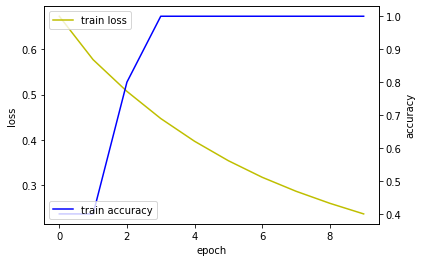

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 39)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 39)               79        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                1280      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33    

## 모델 검증

In [ ]:
x_test = pd.read_csv('/content/final_predict.csv')

In [ ]:
y_test = pd.read_csv('/content/final_y_predict.csv')

In [ ]:
predicted_y = clf.predict(x_test)
print(predicted_y)

np.where(predicted_y == 1)
    
# Evaluate the best model with testing data.
# print(clf.evaluate(test, y_test))

1/1 [==============================] - 0s 6ms/step
[[0.]
 [0.]
 [0.]
 [0.]]


(array([], dtype=int64), array([], dtype=int64))

## 모델 구성 시각화

In [ ]:
from tensorflow.keras.utils import plot_model

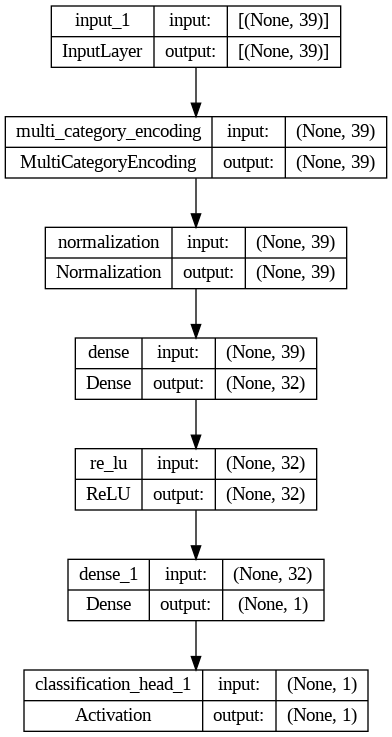

In [ ]:

plot_model(model, show_shapes=True, to_file='model.png')

## 모델 다운로드

In [ ]:
!zip -r '/content/best_model.zip'  '/content/structured_data_classifier/best_model' 

updating: content/structured_data_classifier/best_model/ (stored 0%)
updating: content/structured_data_classifier/best_model/assets/ (stored 0%)
updating: content/structured_data_classifier/best_model/fingerprint.pb (stored 0%)
updating: content/structured_data_classifier/best_model/saved_model.pb (deflated 91%)
updating: content/structured_data_classifier/best_model/variables/ (stored 0%)
updating: content/structured_data_classifier/best_model/variables/variables.index (deflated 59%)
updating: content/structured_data_classifier/best_model/variables/variables.data-00000-of-00001 (deflated 23%)
updating: content/structured_data_classifier/best_model/keras_metadata.pb (deflated 87%)


In [ ]:
model.save("content/")

In [ ]:
model.save("my_h5_model.h5")

In [ ]:
!pip freeze > requirement.txt